In [1]:
from google.colab import files
uploaded = files.upload()  # This will prompt a file upload dialog


Saving Customers.csv to Customers.csv
Saving Products.csv to Products.csv
Saving Transactions.csv to Transactions.csv


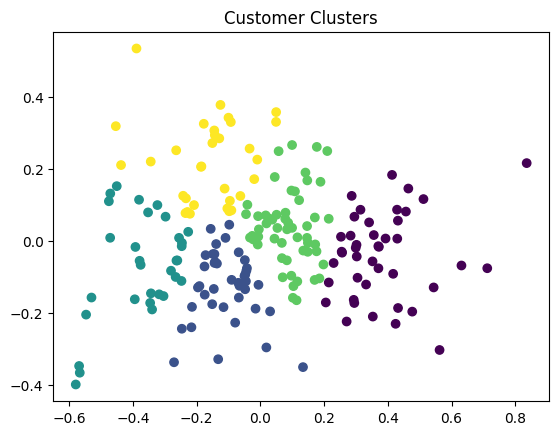

In [2]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
data = pd.merge(customers, transactions, on='CustomerID')

# Feature engineering
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Price': 'mean'
}).reset_index()

# Normalize features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to dataset
customer_features['Cluster'] = clusters

# Calculate metrics
db_index = davies_bouldin_score(scaled_features, clusters)
sil_score = silhouette_score(scaled_features, clusters)

# Visualize clusters (PCA)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters')
plt.show()

# Save results
customer_features.to_csv('Sudhashini_Enugula_Clusters.csv', index=False)
